In [1]:
%matplotlib inline
%load_ext Cython
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import h10
from tqdm import tqdm
from nicks_plot_utils import *

import boost_histogram as bh


w_bins = np.array([1.605, 1.615, 1.625, 1.635, 1.645, 1.655, 1.665, 1.675, 1.685, 1.695,
                   1.705, 1.715, 1.725, 1.735, 1.745, 1.755, 1.765, 1.775, 1.785, 1.795, 1.83,  1.89,  1.95,  2.01])

q2_bins = np.array([1.8,  2.2,  2.6,  3.15, 4.0])


In [2]:
df = pd.read_csv("/Users/tylern/physics_code/build/result.csv", names=['type','w','q2', 'theta', 'phi'])

In [3]:
df['w_bin'] = pd.cut(df['w'], bins=w_bins, include_lowest=True)
df['q2_bin'] = pd.cut(df['q2'], bins=q2_bins, include_lowest=True)
df.dropna(inplace=True)

bins_w = np.sort(pd.unique(df['w_bin']))
bins_q2 = np.sort(pd.unique(df['q2_bin']))

num = min(np.sum(df.type == "norad"),np.sum(df.type == "rad"))
df = pd.concat([df[df.type == "norad"].head(num), df[df.type == "rad"].head(num)])

In [4]:
print(np.sum(df.type == "norad"))
print(np.sum(df.type == "rad"))

3394675
3394675


In [5]:
# print(df[df.type == "rad"].w, df[df.type == "rad"].q2)

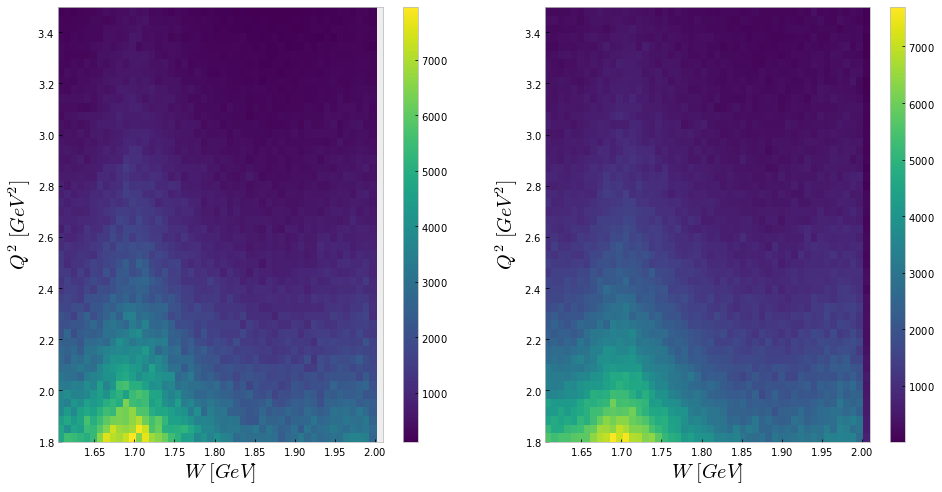

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,8])

hist = Hist2D(df[df.type == "norad"].w, df[df.type == "norad"].q2, xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$", xrange=[1.605, 2.01], xbins=50, yrange=[1.8, 3.5], ybins=50)
hist.plot(ax=ax[0], colorbar=True, density=False, zeros=False)

hist2 = Hist2D(df[df.type == "rad"].w, df[df.type == "rad"].q2, xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$", xrange=[1.605, 2.01], xbins=50, yrange=[1.8, 3.5], ybins=50)
hist2.plot(ax=ax[1], colorbar=True, density=False, zeros=False)

plt.show()

In [7]:
corr = []
for q2 in bins_q2:
    for w in bins_w:
        data = df[(df.w_bin == w) & (df.q2_bin == q2)]
        corr.append([str(np.round(w.left,3)), str(np.round(q2.left,3)), len(data[data.type == "rad"]), len(data[data.type == "norad"])])


In [8]:
ratio = pd.DataFrame(corr, columns=['w_left', 'q2_left', 'rad', 'norad'])

ratio['one_over_R'] = ratio.norad/ratio.rad
ratio['R'] = ratio.rad/ratio.norad

# print(ratio.q2_left.unique())
print(ratio.w_left.unique())

w_map = {
'1.604' :'1.605' ,
'1.615' :'1.615' ,
'1.625' :'1.625' ,
'1.635' :'1.635' ,
'1.645' :'1.645' ,
'1.655' :'1.655' ,
'1.665' :'1.665' ,
'1.675' :'1.675' ,
'1.685' :'1.685' ,
'1.695' :'1.695' ,
'1.705' :'1.705' ,
'1.715' :'1.715' ,
'1.725' :'1.725' ,
'1.735' : '1.735', 
'1.745' : '1.745', 
'1.755' : '1.755', 
'1.765' : '1.765', 
'1.775' : '1.775',
  '1.785' : '1.785', 
  '1.795' : '1.795',
'1.78' : '1.78', 
'1.83' : '1.83',
'1.89': '1.89',
'1.95': '1.95',
}

ratio.w_left = ratio.w_left.map(w_map)


q2_map = {'1.099' : '1.1', 
        '1.3': '1.3', 
        '1.56': '1.56',
          '1.799' : '1.8',
        '1.8': '1.8', 
        '2.2': '2.2', 
        '2.6': '2.6', 
        '3.15': '3.15'}


ratio.q2_left = ratio.q2_left.map(q2_map)
ratio.dropna(inplace=True)

# print(ratio.q2_left.unique())
print(ratio.w_left.unique())

['1.604' '1.615' '1.625' '1.635' '1.645' '1.655' '1.665' '1.675' '1.685'
 '1.695' '1.705' '1.715' '1.725' '1.735' '1.745' '1.755' '1.765' '1.775'
 '1.785' '1.795' '1.83' '1.89' '1.95']
['1.605' '1.615' '1.625' '1.635' '1.645' '1.655' '1.665' '1.675' '1.685'
 '1.695' '1.705' '1.715' '1.725' '1.735' '1.745' '1.755' '1.765' '1.775'
 '1.785' '1.795' '1.83' '1.89' '1.95']


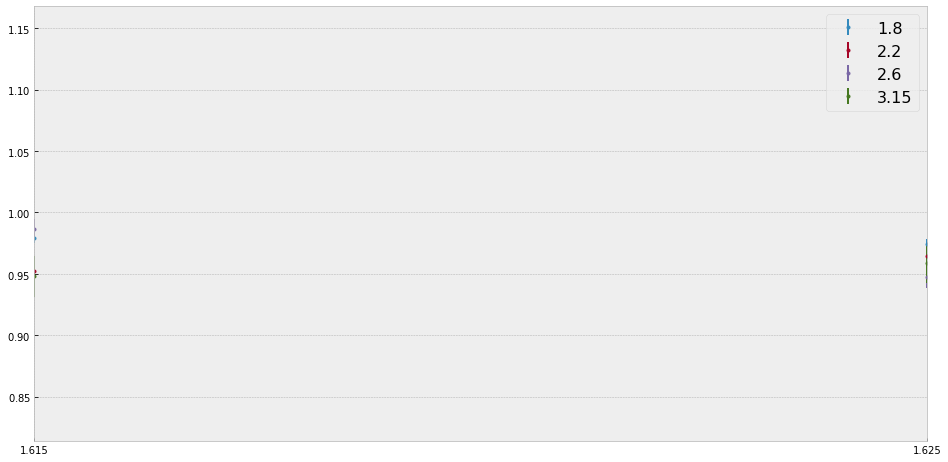

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[16,8])
for _q2_ in pd.unique(ratio.q2_left):
    yerr = 1/np.sqrt(ratio[ratio.q2_left == _q2_].norad)
    scat = ax.errorbar(np.array(ratio[ratio.q2_left == _q2_].w_left), ratio[ratio.q2_left == _q2_].one_over_R, 
                       yerr=yerr, 
                       fmt='.', label=_q2_)
ax.set_xlim(1.0, 2.0)
plt.legend()
plt.show()

In [11]:
ratio.to_csv("/Users/tylern/Data/e1d/radcorr/radcorr_k.csv", index=False, header=False)